# IMPORTAÇÃO DE DADOS E PRIMEIRAS VISUALIZAÇÔES 

In [2]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('rh.csv',thousands= " ")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
import time
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [4]:
df.head(1)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16


In [5]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# TRADUÇÃO DA BASE DE DADOS

In [6]:
df_traduzida = df.rename(columns={'Date of Joining':'DataDeIngresso','Gender':'Sexo','Company Type':'TipoEmpresa','WFH Setup Available':'Configuração','Designation':'NivelAntiguidade','Resource Allocation':'HorasAlocadas','Mental Fatigue Score':'AvaliaçãoEstresse','Burn Rate':'TaxaSaturação'})
df_traduzida.head(1)

,Employee ID,DataDeIngresso,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16


# TRATAMENTO E MANIPULAÇÃO DE DADOS 

In [7]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee ID        22750 non-null  object 
 1   DataDeIngresso     22750 non-null  object 
 2   Sexo               22750 non-null  object 
 3   TipoEmpresa        22750 non-null  object 
 4   Configuração       22750 non-null  object 
 5   NivelAntiguidade   22750 non-null  float64
 6   HorasAlocadas      21369 non-null  float64
 7   AvaliaçãoEstresse  20633 non-null  float64
 8   TaxaSaturação      21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [8]:
# EXCLUIT COLUNAS QUE NÃO SERÃO ÚTEIS

del df_traduzida['Employee ID']

### TRATANDO VALORES NULOS E VALORES DUPLICADOS 

In [9]:
(df_traduzida.isnull().sum() / len(df_traduzida['Sexo']))*100

DataDeIngresso       0.000000
Sexo                 0.000000
TipoEmpresa          0.000000
Configuração         0.000000
NivelAntiguidade     0.000000
HorasAlocadas        6.070330
AvaliaçãoEstresse    9.305495
TaxaSaturação        4.940659
dtype: float64

In [10]:
media = df_traduzida['HorasAlocadas'].mean()
df_traduzida['HorasAlocadas'] = df_traduzida['HorasAlocadas'].fillna(media)

In [11]:
media1 = df_traduzida['AvaliaçãoEstresse'].mean()
df_traduzida['AvaliaçãoEstresse'] = df_traduzida['AvaliaçãoEstresse'].fillna(media1)

In [12]:
media2 = df_traduzida['TaxaSaturação'].mean()
df_traduzida['TaxaSaturação'] = df_traduzida['TaxaSaturação'].fillna(media2)

In [13]:
df_traduzida.duplicated().sum()

10

In [14]:
df_traduzida = df_traduzida.drop_duplicates()

# ANÁLISE EXPLORATÓRIA

## ESTATÍSTICA

In [15]:
df_traduzida.describe()

,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
count,22740.000000,22740.000000,22740.000000,22740.000000
mean,2.178804,4.481390,5.728318,0.451996
std,1.135117,1.984087,1.829074,0.193255
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.700000,0.320000
50%,2.000000,4.481398,5.728188,0.452005
75%,3.000000,6.000000,6.900000,0.580000
max,5.000000,10.000000,10.000000,1.000000


### MODA

In [16]:
from statistics import mode

mode(df_traduzida['NivelAntiguidade'])

2.0

In [17]:
mode(df_traduzida['HorasAlocadas'])

4.0

In [18]:
mode(df_traduzida['AvaliaçãoEstresse'])

5.728187854407987

In [19]:
mode(df_traduzida['TaxaSaturação'])

0.45200545639508

### ASSIMETRIA

In [20]:
df_traduzida['NivelAntiguidade'].skew()

0.09248852601372352

In [21]:
df_traduzida['HorasAlocadas'].skew()

0.21132728140717472

In [22]:
df_traduzida['AvaliaçãoEstresse'].skew()

-0.45185141510626364

In [23]:
df_traduzida['TaxaSaturação'].skew()

0.04746037696778714

### CURTOSE

In [24]:
df_traduzida['NivelAntiguidade'].kurt()

-0.4146294988217005

In [25]:
df_traduzida['HorasAlocadas'].kurt()

-0.31656261548192566

In [26]:
df_traduzida['AvaliaçãoEstresse'].kurt()

0.49861373381513907

In [27]:
df_traduzida['TaxaSaturação'].kurt()

-0.11897318080467123

### HISTOGRAMA

array([[<Axes: title={'center': 'NivelAntiguidade'}>,
        <Axes: title={'center': 'HorasAlocadas'}>],
       [<Axes: title={'center': 'AvaliaçãoEstresse'}>,
        <Axes: title={'center': 'TaxaSaturação'}>]], dtype=object)

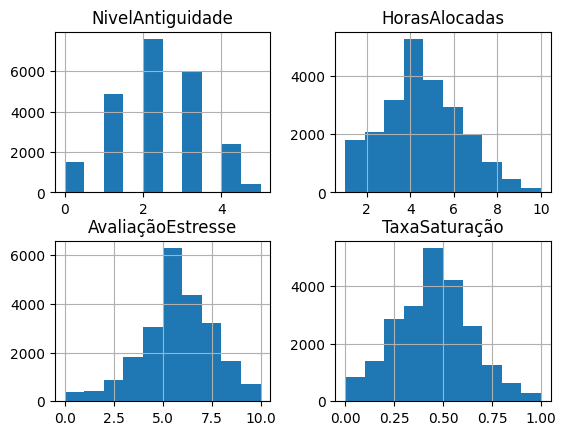

In [28]:
df_traduzida.hist()

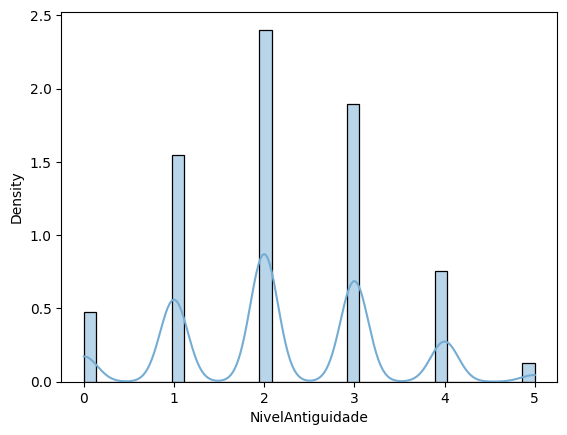

In [29]:
ax = sns.histplot(df_traduzida.NivelAntiguidade, stat="density", kde=True, color='#74acd4', lw=1)

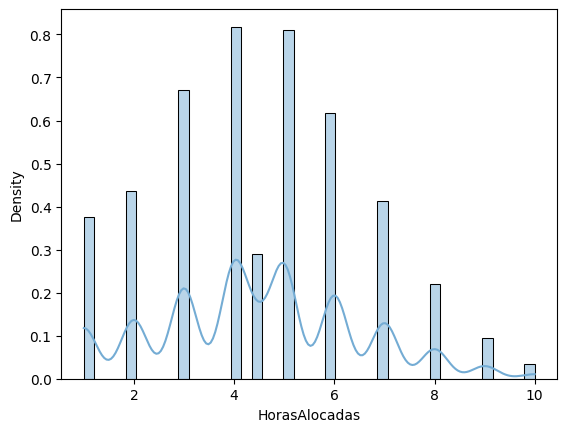

In [30]:
ax = sns.histplot(df_traduzida.HorasAlocadas, stat="density", kde=True, color='#74acd4', lw=1)

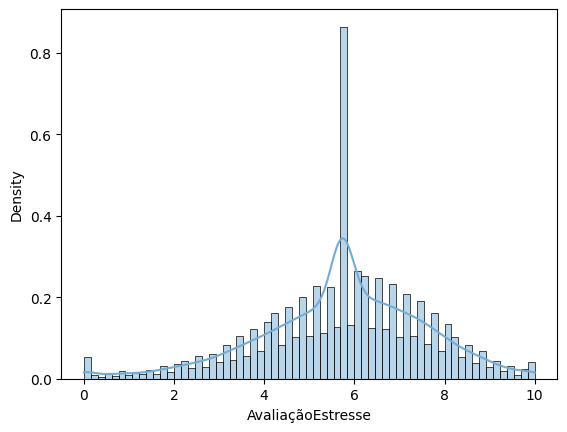

In [31]:
ax = sns.histplot(df_traduzida.AvaliaçãoEstresse, stat="density", kde=True, color='#74acd4', lw=1)

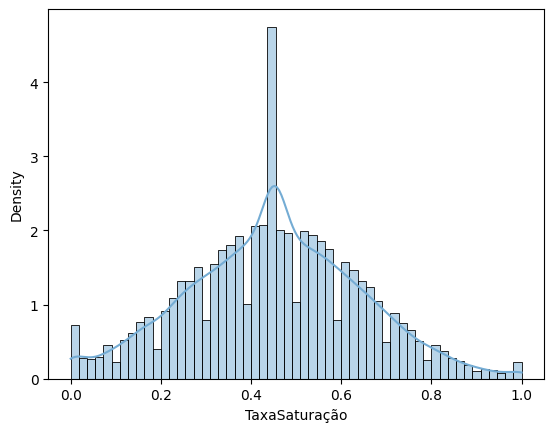

In [32]:
ax = sns.histplot(df_traduzida.TaxaSaturação, stat="density", kde=True, color='#74acd4', lw=1)

### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

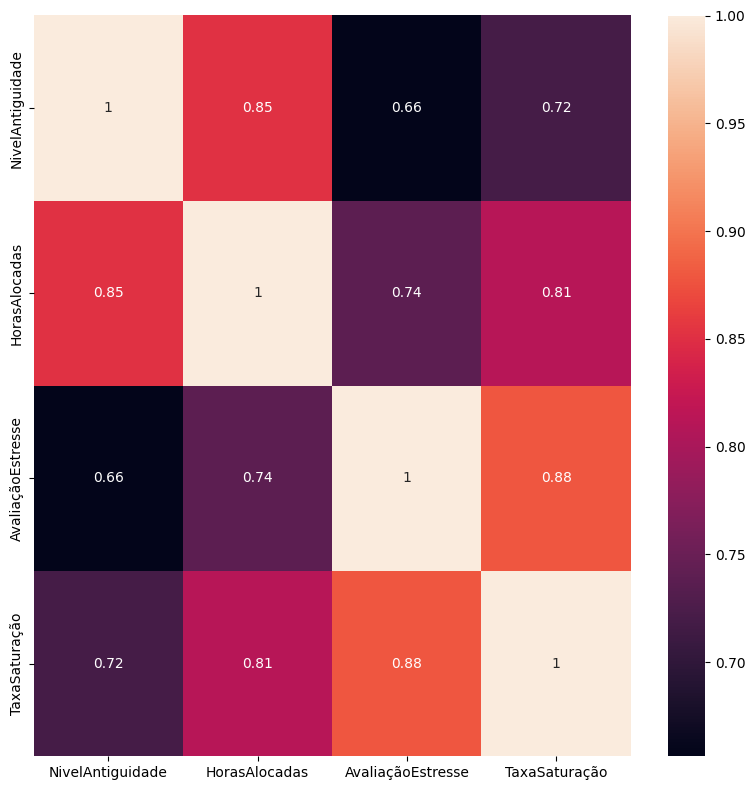

In [33]:
# Suponha que você deseja selecionar apenas colunas numéricas
df_numeric = df_traduzida.select_dtypes(include=['float64', 'int64'])

# Configurações de plot que você já especificou
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True

# Crie o heatmap apenas para as colunas numéricas
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

### VALORES ÚNICO EM CADA VARIAVEL

In [34]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

DataDeIngresso : 366
Sexo : 2
TipoEmpresa : 2
Configuração : 2
NivelAntiguidade : 6
HorasAlocadas : 11
AvaliaçãoEstresse : 102
TaxaSaturação : 102


## verificação de outliers 

NivelAntiguidade : float64
HorasAlocadas : float64
AvaliaçãoEstresse : float64
TaxaSaturação : float64


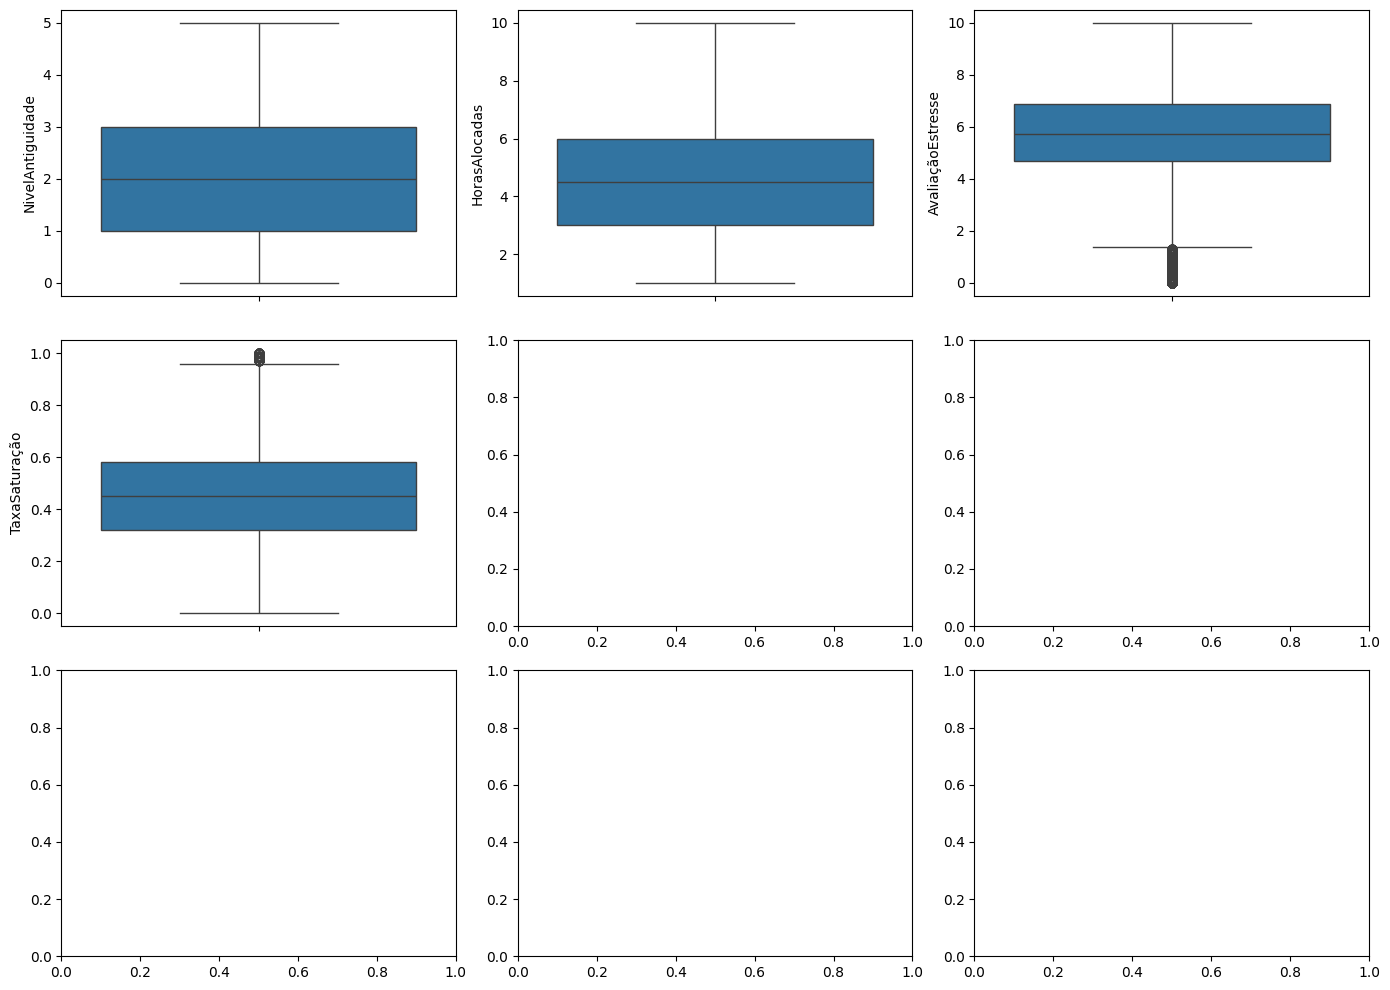

In [35]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

### ANALISANDO DADOS COM PYHWALKER

In [36]:
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DE DADOS 

In [37]:
df_traduzida.head(1)

,DataDeIngresso,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16


### AGRUPAMENTO DE DADOS

In [38]:
df_traduzida.groupby(df_traduzida['Sexo']).size()

Sexo
Female    11901
Male      10839
dtype: int64

In [39]:
df_traduzida.groupby(df_traduzida['TipoEmpresa']).size()

TipoEmpresa
Product     7916
Service    14824
dtype: int64

In [40]:
df_traduzida.groupby(df_traduzida['Configuração']).size()

Configuração
No     10453
Yes    12287
dtype: int64

In [41]:
df_traduzida.groupby(df_traduzida['NivelAntiguidade']).size()

NivelAntiguidade
0.0    1506
1.0    4878
2.0    7586
3.0    5982
4.0    2390
5.0     398
dtype: int64

In [42]:
df_traduzida.groupby(df_traduzida['Sexo']).size()

Sexo
Female    11901
Male      10839
dtype: int64

### PLOTANDO EM UM GRAFICO

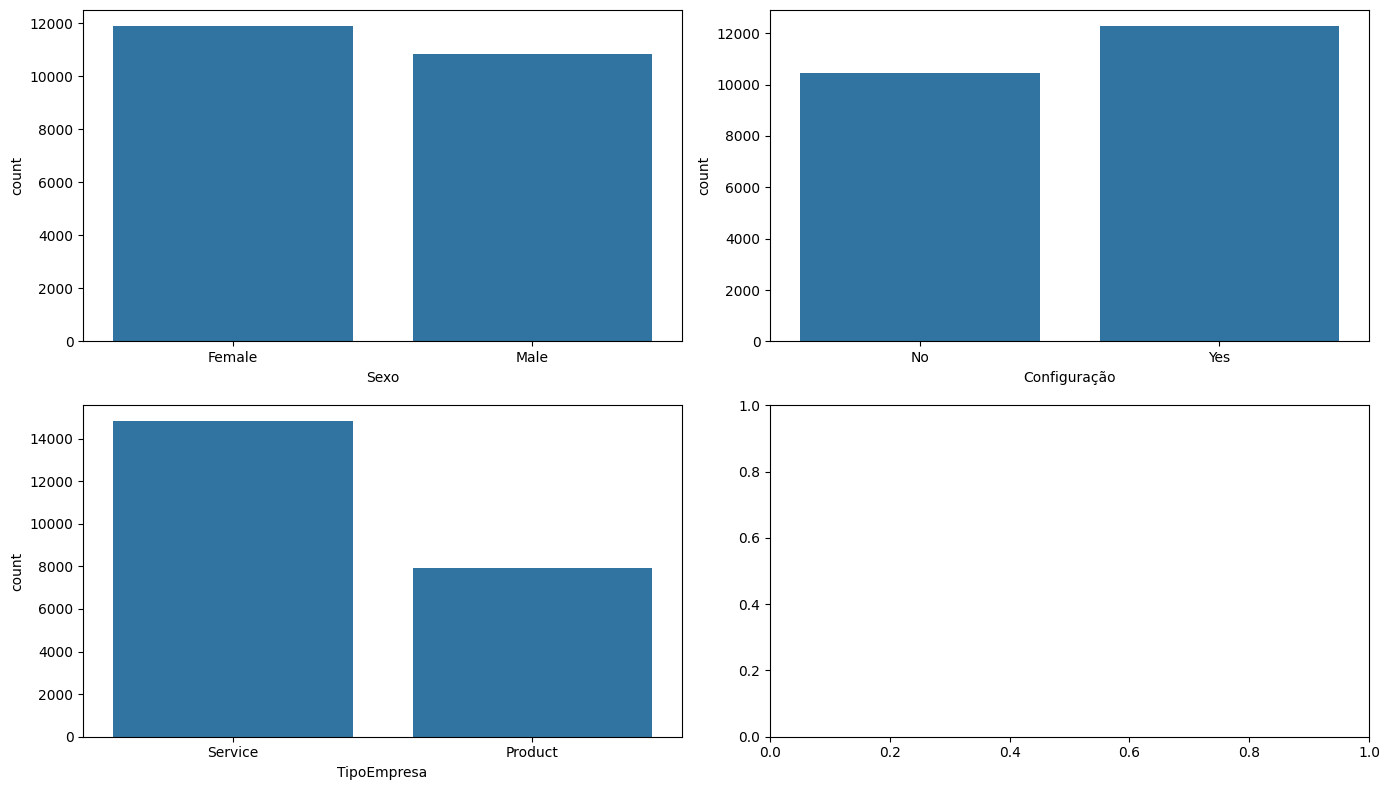

In [43]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="Sexo", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="Configuração", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="TipoEmpresa", ax=axes[1][0])

plt.show()

# SEGMENTANDO ESGOTAMENTO DE FUNCIONARIO

In [44]:
df_traduzida.describe()

,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
count,22740.000000,22740.000000,22740.000000,22740.000000
mean,2.178804,4.481390,5.728318,0.451996
std,1.135117,1.984087,1.829074,0.193255
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.700000,0.320000
50%,2.000000,4.481398,5.728188,0.452005
75%,3.000000,6.000000,6.900000,0.580000
max,5.000000,10.000000,10.000000,1.000000


## ESGOTAMENTO BAIXO

In [45]:
baixo = df_traduzida[df_traduzida['TaxaSaturação']<=0.32] 
baixo['TaxaSaturação'].value_counts().sum()

5723

In [46]:
baixo.head()

,DataDeIngresso,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
5,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
11,2008-05-12,Male,Service,Yes,0.0,1.0,1.8,0.12
15,2008-02-03,Female,Service,Yes,3.0,5.0,4.7,0.32


### PLOTANOD EM UM GRAFICO

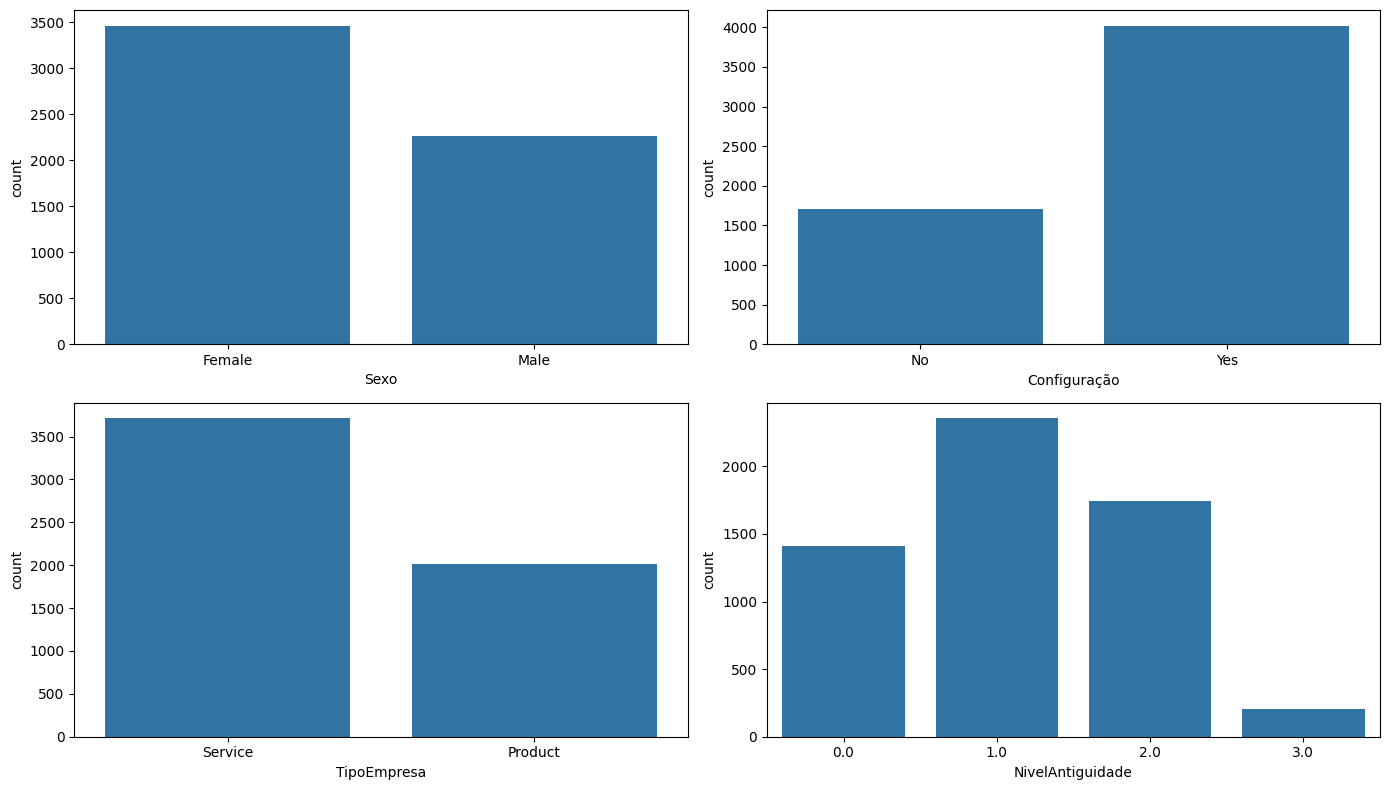

In [47]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = baixo, x="Sexo", ax=axes[0][0])
sns.countplot(data = baixo, x="Configuração", ax=axes[0][1])
sns.countplot(data = baixo, x="TipoEmpresa", ax=axes[1][0])
sns.countplot(data = baixo, x="NivelAntiguidade", ax=axes[1][1])
plt.show()

### MÉDIA DAS HORAS ALOCADAS E DE AVALIAÇÃO DE ESTRESSE POR SEXO

In [48]:
total = baixo.groupby(["Sexo"])["HorasAlocadas"].count().rename('Total')
horas = baixo.groupby(["Sexo"])["HorasAlocadas"].mean().rename('Média Das Horas Alocadas')
estresse = baixo.groupby(['Sexo'])['AvaliaçãoEstresse'].mean().rename('Média Da Avaliação De Estresse')

dados_usuarios = pd.DataFrame({'Total':total,"Média Das Horas Alocadas":horas,'Média Da Avaliação De Estresse':estresse})

dados_usuarios.sort_values("Total", ascending=False).head(5)

,Total,Média Das Horas Alocadas,Média Da Avaliação De Estresse
Sexo,,,
Female,3461,2.41469,3.567271
Male,2262,2.45261,3.591470


### MÉDIA DAS HORAS ALOCADAS E DE AVALIAÇÃO DE ESTRESSE POR EMPRESA

In [49]:
total = baixo.groupby(["TipoEmpresa"])["HorasAlocadas"].count().rename('Total')
horas = baixo.groupby(["TipoEmpresa"])["HorasAlocadas"].mean().rename('Média Das Horas Alocadas')
estresse = baixo.groupby(['TipoEmpresa'])['AvaliaçãoEstresse'].mean().rename('Média Da Avaliação De Estresse')

dados_usuarios = pd.DataFrame({'Total':total,"Média Das Horas Alocadas":horas,'Média Da Avaliação De Estresse':estresse})

dados_usuarios.sort_values("Total", ascending=False).head(5)

,Total,Média Das Horas Alocadas,Média Da Avaliação De Estresse
TipoEmpresa,,,
Service,3712,2.441117,3.582262
Product,2011,2.408562,3.566818


## ESGOTAMENTO MÉDIO

In [50]:
medio = df_traduzida.query('TaxaSaturação > 0.32 and TaxaSaturação <= 0.50')
medio['TaxaSaturação'].value_counts().sum()

8423

In [51]:
medio.head()

,DataDeIngresso,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
1,2008-11-30,Male,Service,Yes,1.0,2.000000,5.000000,0.36
2,2008-03-10,Female,Product,Yes,2.0,4.481398,5.800000,0.49
7,2008-10-31,Female,Service,Yes,2.0,4.000000,4.400000,0.33
10,2008-03-16,Male,Product,Yes,2.0,3.000000,5.300000,0.50
12,2008-01-20,Male,Service,Yes,2.0,5.000000,5.728188,0.40


### PLOTANDO EM UM GRAFICO

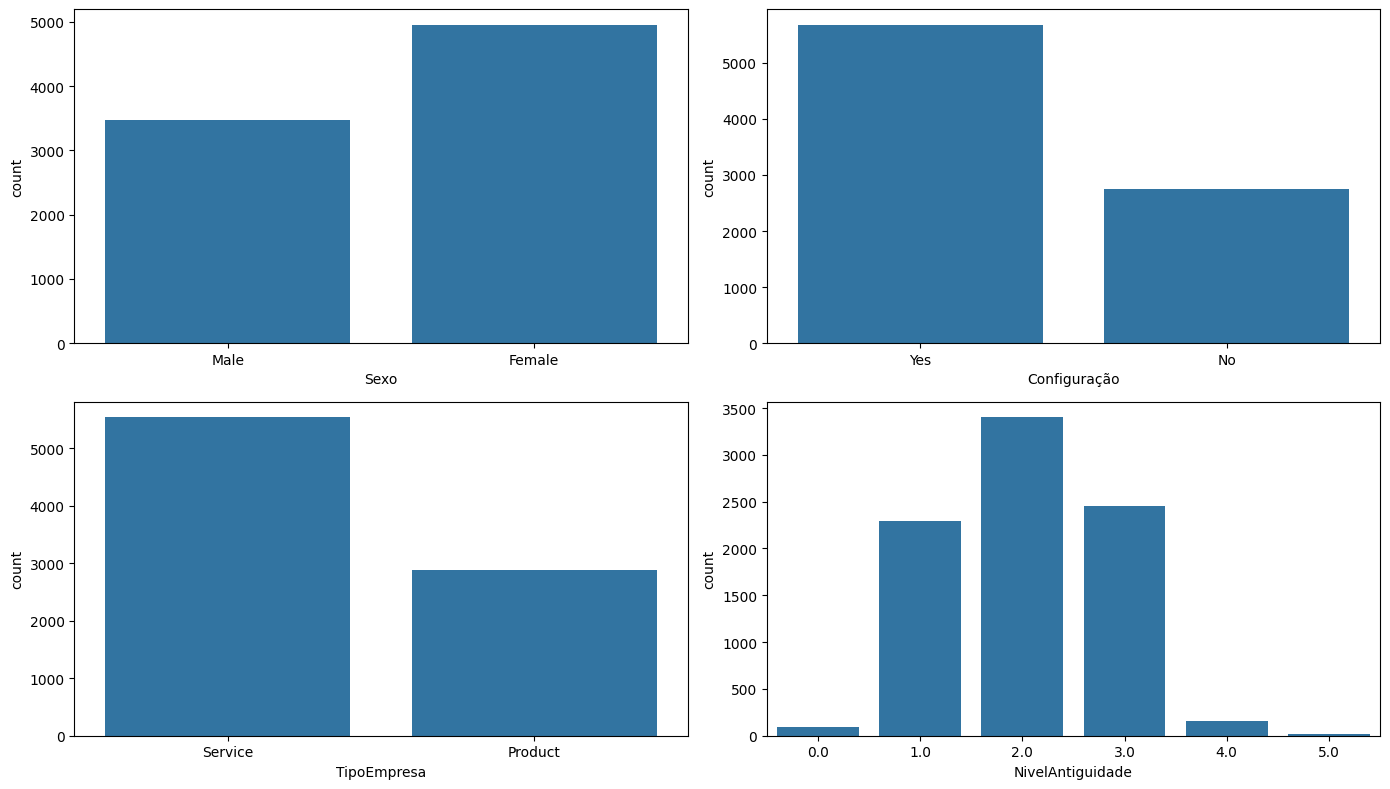

In [52]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = medio, x="Sexo", ax=axes[0][0])
sns.countplot(data = medio, x="Configuração", ax=axes[0][1])
sns.countplot(data = medio, x="TipoEmpresa", ax=axes[1][0])
sns.countplot(data = medio, x="NivelAntiguidade", ax=axes[1][1])
plt.show()

### MÉDIA DAS HORAS ALOCADAS E DE AVALIAÇÃO DE ESTRESSE

In [53]:
total = medio.groupby(["Sexo"])["HorasAlocadas"].count().rename('Total')
horas = medio.groupby(["Sexo"])["HorasAlocadas"].mean().rename('Média Das Horas Alocadas')
estresse = medio.groupby(['Sexo'])['AvaliaçãoEstresse'].mean().rename('Média Da Avaliação De Estresse')

dados_usuarios = pd.DataFrame({'Total':total,"Média Das Horas Alocadas":horas,'Média Da Avaliação De Estresse':estresse})

dados_usuarios.sort_values("Total", ascending=False).head(5)

,Total,Média Das Horas Alocadas,Média Da Avaliação De Estresse
Sexo,,,
Female,4953,4.065432,5.569866
Male,3470,4.165797,5.644106


### MÉDIA DAS HORAS ALOCADAS E DE AVALIAÇÃO DE ESTRESSE POR EMPRESA

In [54]:
total = medio.groupby(["TipoEmpresa"])["HorasAlocadas"].count().rename('Total')
horas = medio.groupby(["TipoEmpresa"])["HorasAlocadas"].mean().rename('Média Das Horas Alocadas')
estresse = medio.groupby(['TipoEmpresa'])['AvaliaçãoEstresse'].mean().rename('Média Da Avaliação De Estresse')

dados_usuarios = pd.DataFrame({'Total':total,"Média Das Horas Alocadas":horas,'Média Da Avaliação De Estresse':estresse})

dados_usuarios.sort_values("Total", ascending=False).head(5)

,Total,Média Das Horas Alocadas,Média Da Avaliação De Estresse
TipoEmpresa,,,
Service,5537,4.101701,5.59491
Product,2886,4.116522,5.61108


## ESGOTAMENTO ALTO

In [55]:
alto = df_traduzida.query('TaxaSaturação > 0.500000 and TaxaSaturação <= 1.000000')
alto['TaxaSaturação'].value_counts().sum()

8594

In [56]:
alto.head()

,DataDeIngresso,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
4,2008-07-24,Female,Service,No,3.0,7.0,6.900000,0.52
6,2008-01-02,Female,Service,No,3.0,6.0,7.900000,0.62
8,2008-12-27,Female,Service,No,3.0,6.0,5.728188,0.56
9,2008-03-09,Female,Product,No,3.0,6.0,5.728188,0.67
14,2008-05-14,Male,Product,Yes,1.0,3.0,5.800000,0.51


### PLOTANDO EM UM GRAFICO

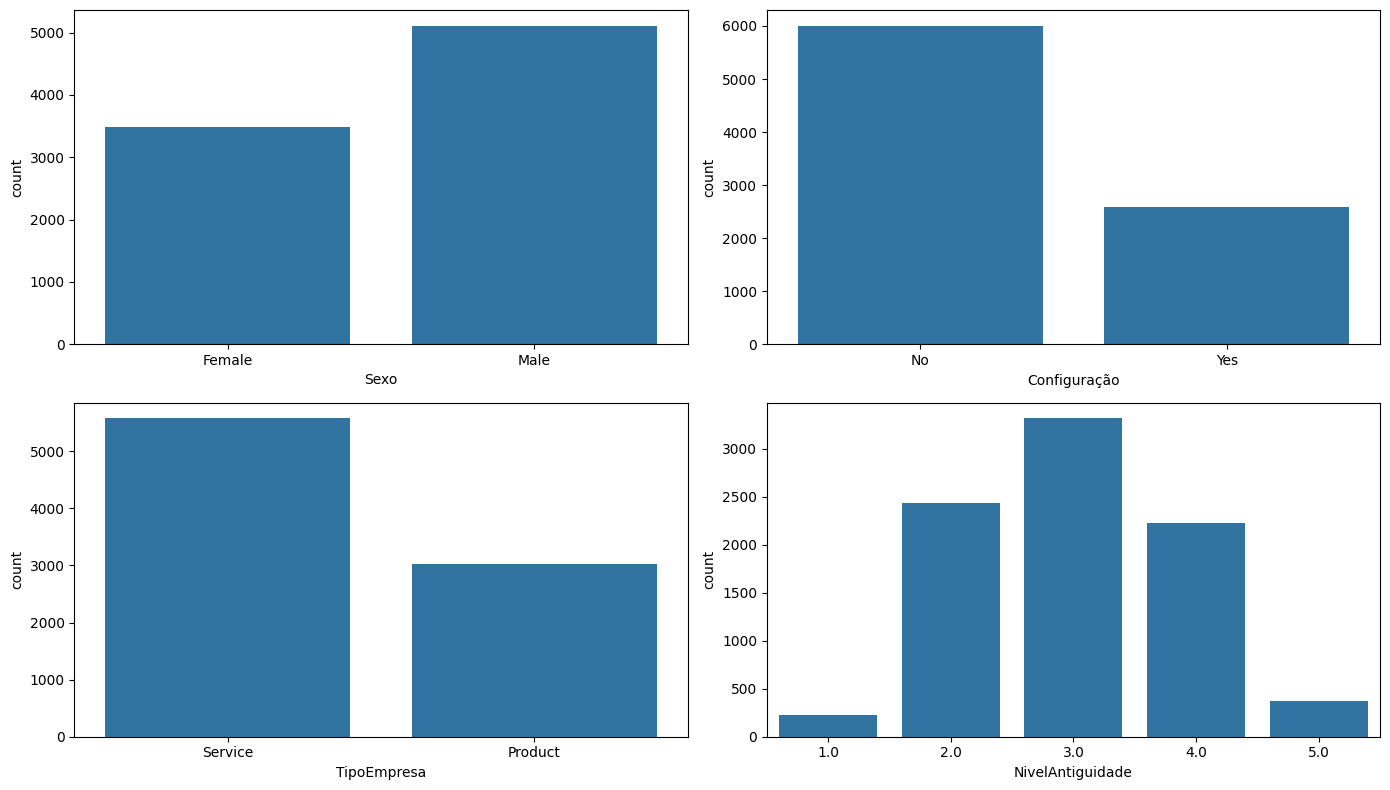

In [57]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = alto, x="Sexo", ax=axes[0][0])
sns.countplot(data = alto, x="Configuração", ax=axes[0][1])
sns.countplot(data = alto, x="TipoEmpresa", ax=axes[1][0])
sns.countplot(data = alto, x="NivelAntiguidade", ax=axes[1][1])
plt.show()

### MÉDIA DAS HORAS ALOCADAS E DE AVALIAÇÃO DE ESTRESSE

In [58]:
total = alto.groupby(["Sexo"])["HorasAlocadas"].count().rename('Total')
horas = alto.groupby(["Sexo"])["HorasAlocadas"].mean().rename('Média Das Horas Alocadas')
estresse = alto.groupby(['Sexo'])['AvaliaçãoEstresse'].mean().rename('Média Da Avaliação De Estresse')

dados_usuarios = pd.DataFrame({'Total':total,"Média Das Horas Alocadas":horas,'Média Da Avaliação De Estresse':estresse})

dados_usuarios.sort_values("Total", ascending=False).head(5)

,Total,Média Das Horas Alocadas,Média Da Avaliação De Estresse
Sexo,,,
Male,5107,6.206270,7.295594
Female,3487,6.227401,7.272882


### MÉDIA DAS HORAS ALOCADAS E DE AVALIAÇÃO DE ESTRESSE POR EMPRESA

In [59]:
total = alto.groupby(["TipoEmpresa"])["HorasAlocadas"].count().rename('Total')
horas = alto.groupby(["TipoEmpresa"])["HorasAlocadas"].mean().rename('Média Das Horas Alocadas')
estresse = alto.groupby(['TipoEmpresa'])['AvaliaçãoEstresse'].mean().rename('Média Da Avaliação De Estresse')

dados_usuarios = pd.DataFrame({'Total':total,"Média Das Horas Alocadas":horas,'Média Da Avaliação De Estresse':estresse})

dados_usuarios.sort_values("Total", ascending=False).head(5)

,Total,Média Das Horas Alocadas,Média Da Avaliação De Estresse
TipoEmpresa,,,
Service,5575,6.239232,7.299089
Product,3019,6.169808,7.262908


# MACHINE LEANING 

## PRÉ-PROCESSAMENTO

In [60]:
# EXCLUINDO VARIAVEL QUE NÃO SERÁ UTILIZADA

del df_traduzida['DataDeIngresso']

## ENCODER

In [61]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['Sexo'] = lb.fit_transform(df_traduzida['Sexo'])
df_traduzida['Configuração'] = lb.fit_transform(df_traduzida['Configuração'])
df_traduzida['TipoEmpresa'] = lb.fit_transform(df_traduzida['TipoEmpresa'])
# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

### Separa X e y

In [62]:
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

In [63]:
X.head(1)

,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse
0,0,1,0,2.0,3.0,3.8


In [64]:
y.head(1)

0    0.16
Name: TaxaSaturação, dtype: float64

In [65]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### XGBOOST

In [66]:
# check xgboost version
from xgboost import XGBRegressor

# Criando o modelo
modelo1 = XGBRegressor()

# Treinando o modelo
modelo1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
# Fazendo previsões
y_predI = modelo1.predict(X_test)
previsoes = [round(value) for value in y_predI]

In [68]:
# Scores:
print(r2_score(y_test, y_predI))

# Calculando o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predI)

# Calculando o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_predI)

#Erro Médio Absoluto (MAE): 
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predI)

print("#Erro Médio Absoluto (MAE): %.2f" % mae)
print("Mean Squared Error (MSE): %.2f" % mse)
print("Coeficiente de Determinação (R²): %.2f" % r2)

0.8652710883860355
#Erro Médio Absoluto (MAE): 0.05
Mean Squared Error (MSE): 0.01
Coeficiente de Determinação (R²): 0.87


In [69]:
df_traduzida.head()

,Sexo,TipoEmpresa,Configuração,NivelAntiguidade,HorasAlocadas,AvaliaçãoEstresse,TaxaSaturação
0,0,1,0,2.0,3.000000,3.8,0.16
1,1,1,1,1.0,2.000000,5.0,0.36
2,0,0,1,2.0,4.481398,5.8,0.49
3,1,1,1,1.0,1.000000,2.6,0.20
4,0,1,0,3.0,7.000000,6.9,0.52
